In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm
from tqdm import tqdm 

In [2]:
# Load the dataset
thermal_image_path  = r'P:\Thesis\Dataset\PV cell\thermal_projection\PHOTOVOLTAIC THERMAL IMAGES DATASET\imgs_temp.npy'
mask_image_path = r'P:\Thesis\Dataset\PV cell\thermal_projection\PHOTOVOLTAIC THERMAL IMAGES DATASET\imgs_mask.npy'
thermal_images = np.load(thermal_image_path)
mask_images = np.load(mask_image_path)

# Check the shapes of the datasets
print(f"Thermal images shape: {thermal_images.shape}")
print(f"Mask images shape: {mask_images.shape}")


Thermal images shape: (1009, 512, 640)
Mask images shape: (1009, 512, 640)


In [3]:
# Select an index for the image
image_index = 0

thermal_image = thermal_images[image_index]
# Normalize the thermal image for visualization
thermal_image_norm = (thermal_image - thermal_image.min()) / (thermal_image.max() - thermal_image.min())

mask_image = mask_images[image_index]


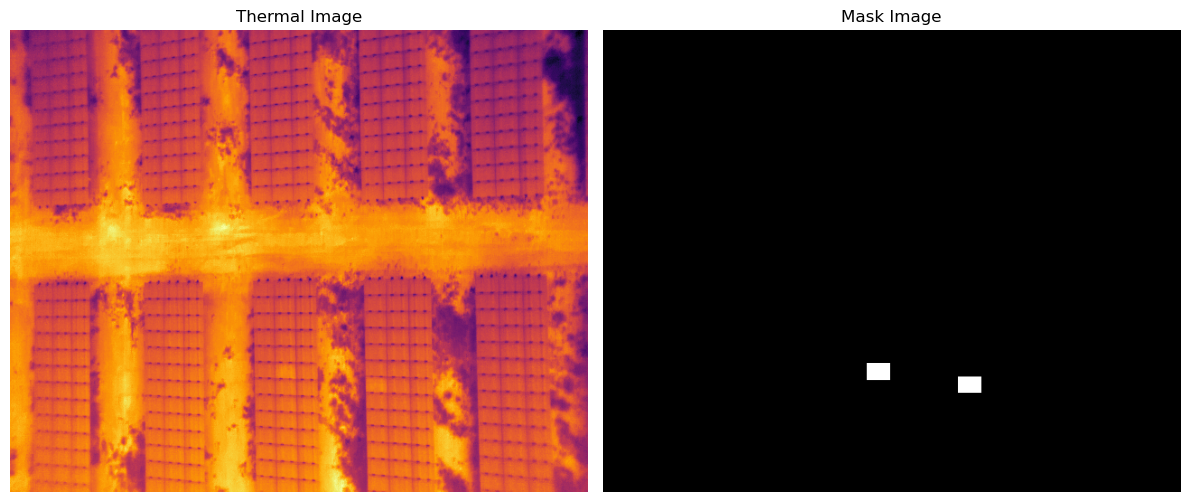

In [4]:
# Plot the thermal image and its corresponding mask
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Thermal image with colormap
axs[0].imshow(thermal_image_norm, cmap='inferno')
axs[0].set_title('Thermal Image')
axs[0].axis('off')

# Mask image
axs[1].imshow(mask_image, cmap='gray')  # Assuming mask is grayscale
axs[1].set_title('Mask Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Output folder paths
output_folder_thermal = 'output/thermal_images'
output_folder_masks = 'output/mask_images'
output_folder_combined = 'output/combined_images'

# Create output directories
os.makedirs(output_folder_thermal, exist_ok=True)
os.makedirs(output_folder_masks, exist_ok=True)
os.makedirs(output_folder_combined, exist_ok=True)

In [6]:
# Palette definition
palette = [0, 0, 0, 255, 255, 255]  # Black for 0, White for 1

# Use tqdm to wrap the range for the progress bar
for i in tqdm(range(thermal_images.shape[0]), desc="Processing Images", unit="image"):
    # Thermal image normalization
    thermal_image = thermal_images[i]
    thermal_image_norm = (thermal_image - thermal_image.min()) / (thermal_image.max() - thermal_image.min())

    # Apply colormap to thermal image and convert to RGB
    thermal_colored = (cm.inferno(thermal_image_norm)[:, :, :3] * 255).astype(np.uint8)
    thermal_pil = Image.fromarray(thermal_colored)

    # Convert mask to palette image
    mask_image = mask_images[i]
    mask_image_uint8 = (mask_image * 255).astype(np.uint8)  # Assuming binary values (0 and 1)
    mask_pil = Image.fromarray(mask_image_uint8, mode='P')  # Create a palette image
    mask_pil.putpalette(palette)  # Assign the palette

    # Save thermal and mask images separately
    thermal_pil.save(os.path.join(output_folder_thermal, f"{i}.png"))
    mask_pil.save(os.path.join(output_folder_masks, f"{i}.png"))

    # Combine thermal and mask images side by side
    combined_width = thermal_pil.width + mask_pil.width
    combined_height = max(thermal_pil.height, mask_pil.height)
    combined_image = Image.new('RGB', (combined_width, combined_height))

    # Paste the images side by side
    combined_image.paste(thermal_pil, (0, 0))
    combined_image.paste(mask_pil.convert('RGB'), (thermal_pil.width, 0))

    # Save the combined image
    combined_image.save(os.path.join(output_folder_combined, f"combined_{i}.png"))

print("Processing complete!")

Processing Images: 100%|██████████| 1009/1009 [04:18<00:00,  3.90image/s]

Processing complete!
